In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# метод рунге кутта
def rk4(f, y0, x1, x2, h):
    num = int((x2 - x1) / h)
    
    x_arr = np.zeros(num + 1)
    y_arr = np.zeros((num + 1, 2))
    
    x_arr[0] = x1
    y_arr[0] = y0
    x = x1
    y = y0
    for i in range(1, num + 1):
        k1 = f(x, y)
        k2 = f(x + h / 2, y + h / 2 * k1)
        k3 = f(x + h / 2, y + h / 2 * k2)
        k4 = f(x + h, y + h * k3)
        y = y + h / 6 * (k1 + 2 * k2 + 2 * k3 + k4)
        x += h
        x_arr[i] = x
        y_arr[i] = y
        
    return (x_arr, y_arr)

In [3]:
# диффур
def f(x, y):
    return np.array([y[1], (10 + x ** 2) * y[0] + x * np.exp(-x)])

# однородный диффур
def f0(x, y):
    return np.array([y[1], 10 * y[0]])

Text(0, 0.5, 'y')

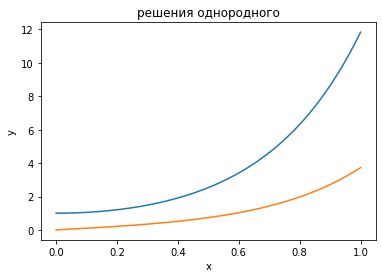

In [4]:
# решаем задачу Коши для однородного уравнения y(0) = 1, y'(0) = 0
data_1 = rk4(f0, np.array([1, 0]), 0, 1, 0.001)
y_1 = data_1[1][:, 0]
plt.plot(data_1[0], data_1[1][:, 0])
x = data_1[0]
# решаем задачу Коши для однородного уравнения y(0) = 0, y'(0) = 1
data_2 = rk4(f0, np.array([0, 1]), 0, 1, 0.001)
y_2 = data_2[1][:, 0]
plt.plot(data_2[0], data_2[1][:, 0])
plt.title("решения однородного")
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

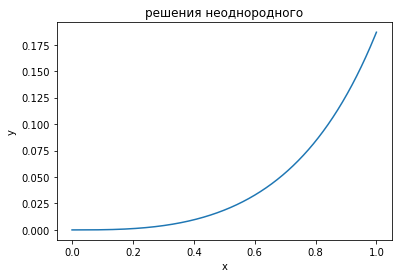

In [5]:
# решаем задачу Коши для неоднородного уравнения y(0) = 0, y'(0) = 0
data_0 = rk4(f, np.array([0, 0]), 0, 1, 0.001)
y_0 = data_0[1][:, 0]
plt.plot(data_0[0], data_0[1][:, 0])
plt.title("решения неоднородного")
plt.xlabel('x')
plt.ylabel('y')

теперь общее решение это $y_0 + \alpha y_1 + \beta y_2$. Построим например решение с $\alpha = 1, \beta = 2$

Text(0, 0.5, 'y')

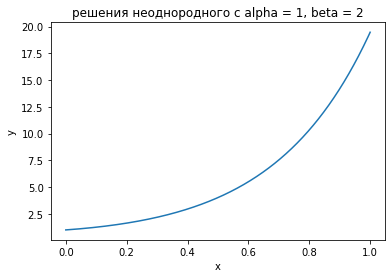

In [6]:
alpha = 1
beta = 2
plt.plot(x, y_0 + alpha * y_1 + beta * y_2)
plt.title(f"решения неоднородного c alpha = {alpha}, beta = {beta}")
plt.xlabel('x')
plt.ylabel('y')